In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df["Type"] = df["Type"].astype("category")
df["Content Rating"] = df["Content Rating"].astype("category")
df["Rating"].fillna(2.0, inplace = True)
df = df.dropna()
df["Installs"] = df["Installs"].str.replace("+", "")
df["Installs"] = df["Installs"].str.replace(",", "").astype("int")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# EDA 1:  Which is the most used Android version?

In [4]:
versionInstalls = df.groupby("Android Ver")["Installs"].sum().reset_index()
versionInstalls["Android Ver"] = versionInstalls["Android Ver"].str.replace("and up", "")
versionInstalls["Android Ver"] = versionInstalls["Android Ver"].str.replace("W", "")
versionInstalls.head()

,Android Ver,Installs
0,1.0,60000
1,1.5,22841710
2,1.6,46413552
3,2.0,35512900
4,2.0.1,101070060


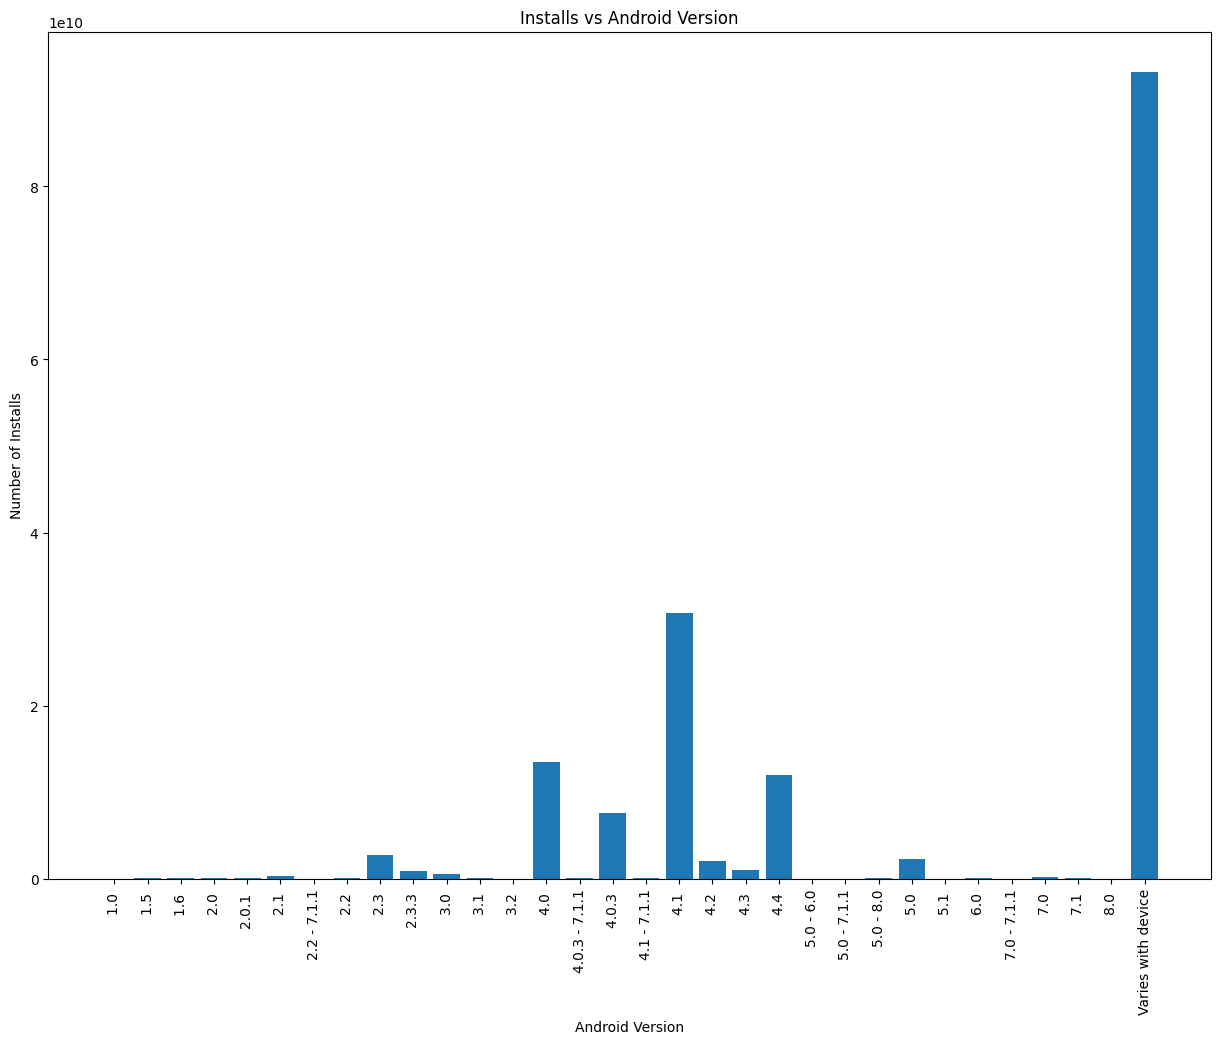

In [5]:
plt.figure(figsize=(15, 11)) 
plt.bar(versionInstalls["Android Ver"], versionInstalls["Installs"])
plt.xlabel("Android Version")
plt.ylabel("Number of Installs")
plt.title("Installs vs Android Version")
plt.xticks(rotation='vertical')
plt.show()

# EDA 2: Which all categories of mobile apps are existing from this dataset? Which Category most popular?

In [6]:
df["Category"] = df["Category"].str.replace("_", " ").str.title()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art And Design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
catInstalls = df.groupby("Category")["Installs"].sum().reset_index()
catInstalls.head()

,Category,Installs
0,Art And Design,124333100
1,Auto And Vehicles,53130211
2,Beauty,27197050
3,Books And Reference,1921468576
4,Business,1001914865


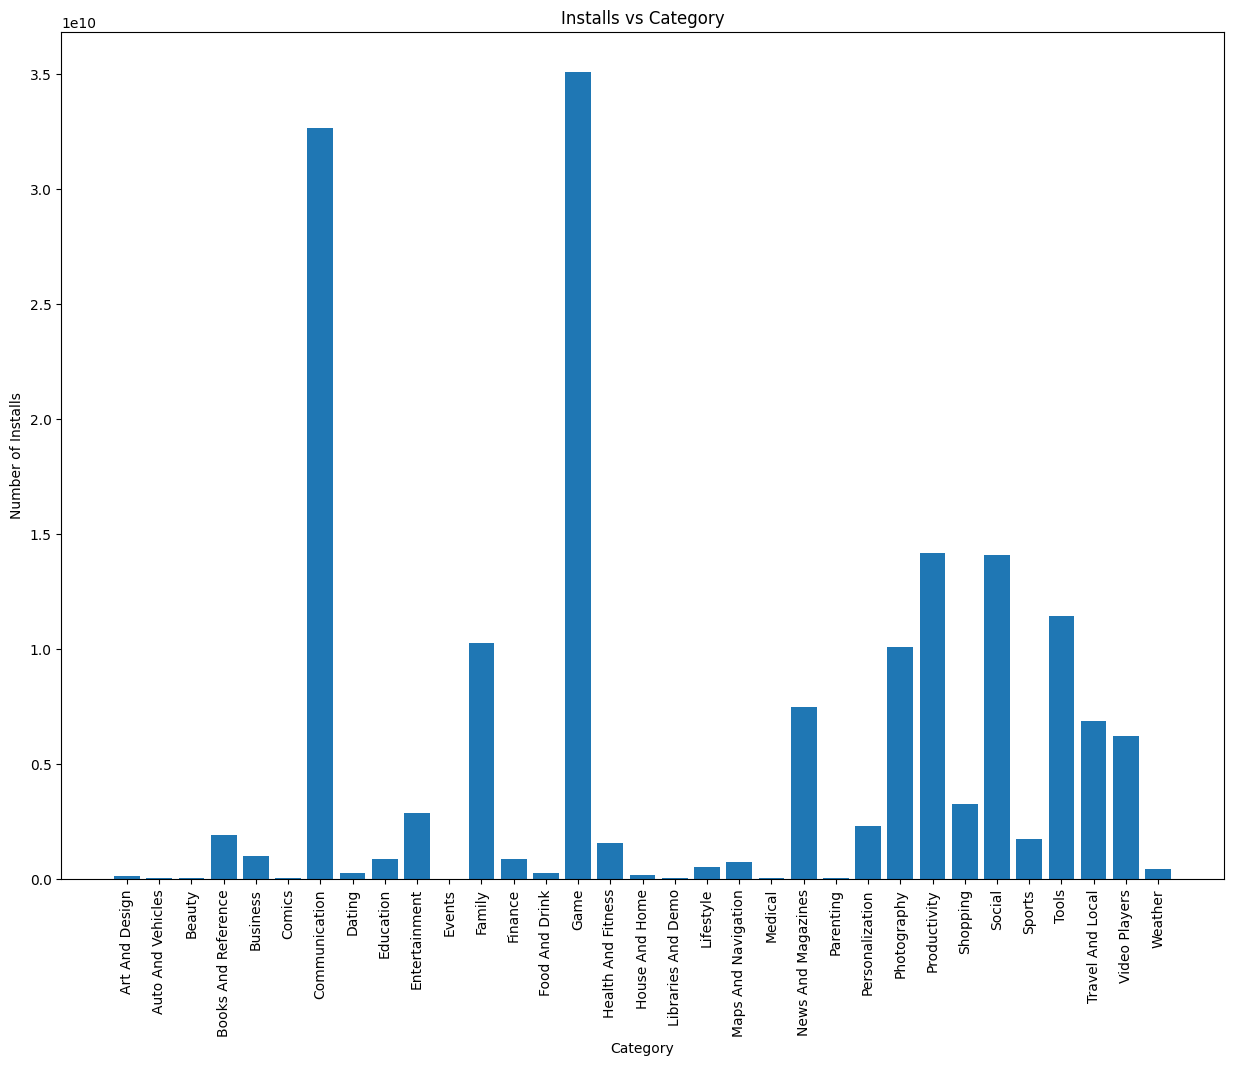

In [8]:
plt.figure(figsize=(15, 11)) 
plt.bar(catInstalls["Category"], catInstalls["Installs"])
plt.xlabel("Category")
plt.ylabel("Number of Installs")
plt.title("Installs vs Category")
plt.xticks(rotation='vertical')
plt.show()

# EDA 3: Which apps have got 5-star ratings?

In [9]:
df['Rating'].astype("float")
bins = [  0.9, 1.9, 2.9, 3.9, 4.9, 5.1]
labels = [  "1-2", "2-3", "3-4", "4-5", "5"]
df["Ratings"] = pd.cut(df["Rating"], bins = bins, labels = labels, include_lowest=True)
app_count = df['Ratings'].value_counts().reset_index().dropna()
app_count.columns = ['Rating_Category', 'Count']
app_count = app_count.dropna()
app_count




,Rating_Category,Count
0,4-5,7089
1,3-4,1710
2,2-3,1700
3,5,274
4,1-2,56


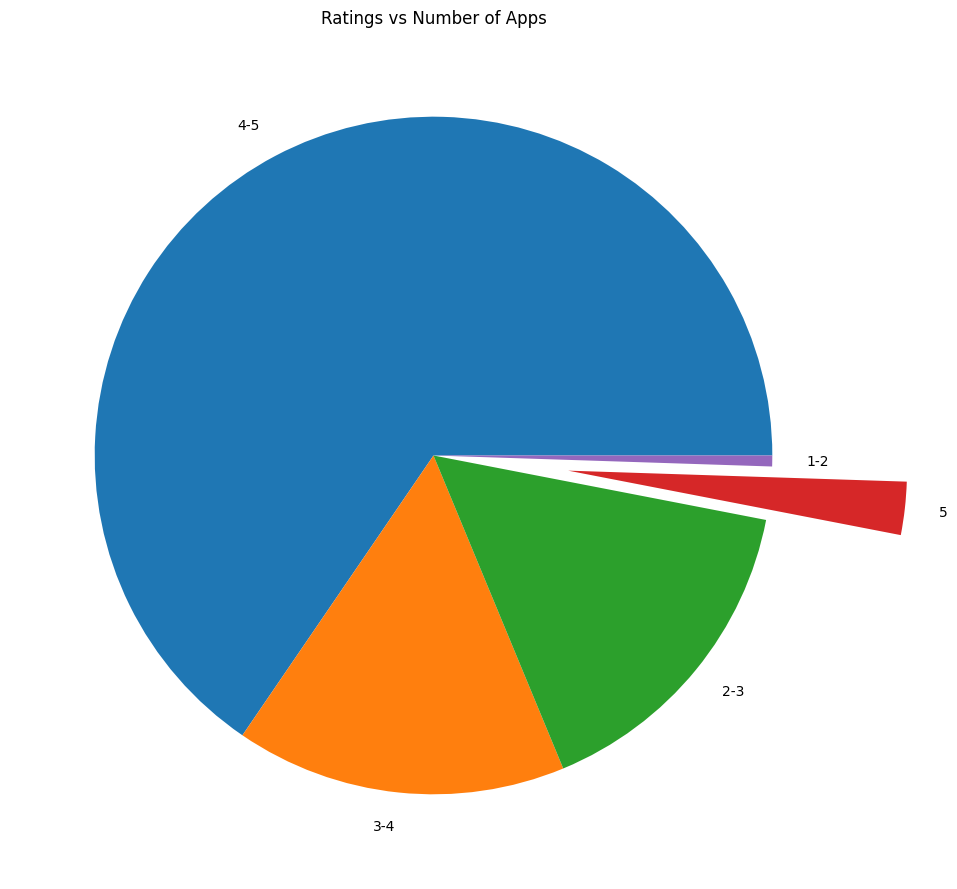

In [10]:
explode = (0,0,0,0.4,0)
plt.figure(figsize=(15, 11)) 
plt.pie(app_count['Count'], labels=app_count['Rating_Category'], explode = explode)
plt.title("Ratings vs Number of Apps")
plt.show()

# EDA 4: Which are the top/bottom 10 mob apps based on ratings?

In [11]:
df["Rank"] = df["Rating"].rank(ascending = False)
df = df.sort_values(by = "Rank")
print("Top 10 Apps based on rating are : \n")
df2 = df[["App", "Category", "Size", "Rating"]].head(10).set_index("Rating")
df2

Top 10 Apps based on rating are : 



,App,Category,Size
Rating,,,
5.0,Ríos de Fe,Lifestyle,15M
5.0,Comunidad De Fe Minitries,Lifestyle,11M
5.0,Morse Player,Family,2.4M
5.0,Safe Santa Fe,Family,12M
5.0,Quran Khmer Offline AY,Family,4.0M
5.0,Santa Fe Thrive,Health And Fitness,8.3M
5.0,Eternal life,Libraries And Demo,2.5M
5.0,CJ Gospel Hour,Social,18M
5.0,Dr. ES PV Calculator,Tools,11M


In [12]:
print("Bottom 10 Apps based on rating are : \n")
df1 = df[["App", "Category", "Size", "Rating"]].tail(10).set_index("Rating")
df1

Bottom 10 Apps based on rating are : 



,App,Category,Size
Rating,,,
1.0,Thistletown CI,Productivity,6.6M
1.0,Tech CU Card Manager,Finance,7.2M
1.0,CB Mobile Biz,Finance,8.4M
1.0,Truck Driving Test Class 3 BC,Family,2.0M
1.0,Clarksburg AH,Medical,28M
1.0,MbH BM,Medical,2.3M
1.0,DS Creator 2.0,Tools,4.4M
1.0,Speech Therapy: F,Family,16M
1.0,FE Mechanical Engineering Prep,Family,21M


# EDA 5 : Distrubutions of Type of Apps

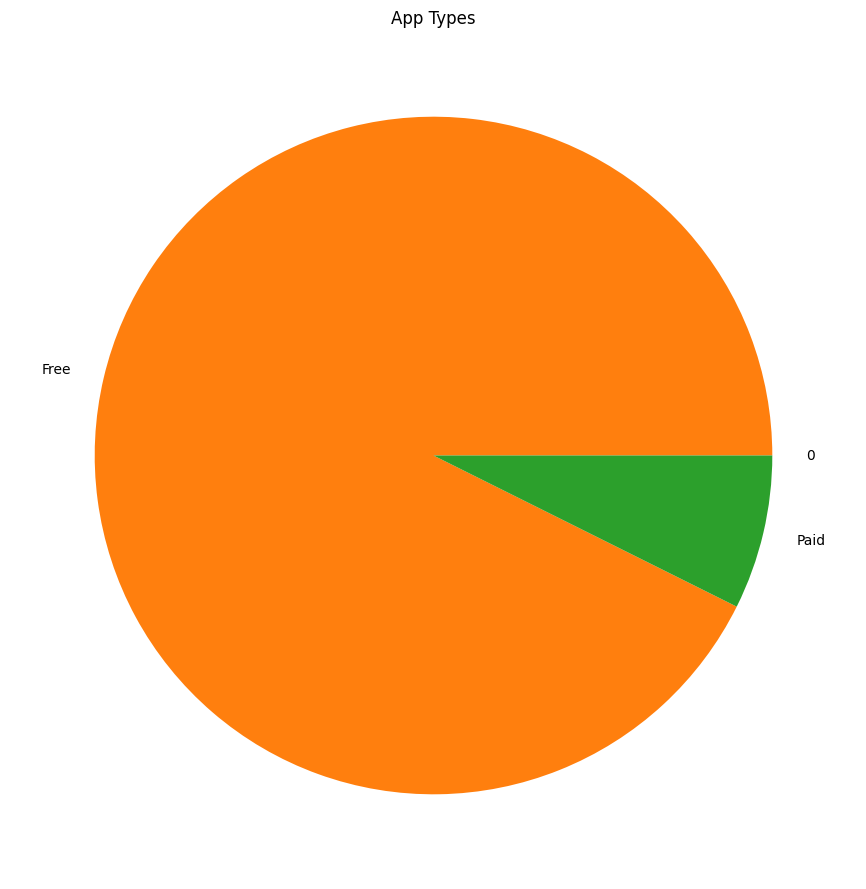

In [13]:
Typecount = df.groupby("Type")["App"].size().reset_index()
plt.figure(figsize = (15,11))
plt.pie(Typecount["App"], labels = Typecount["Type"])
plt.title("App Types")
plt.show()


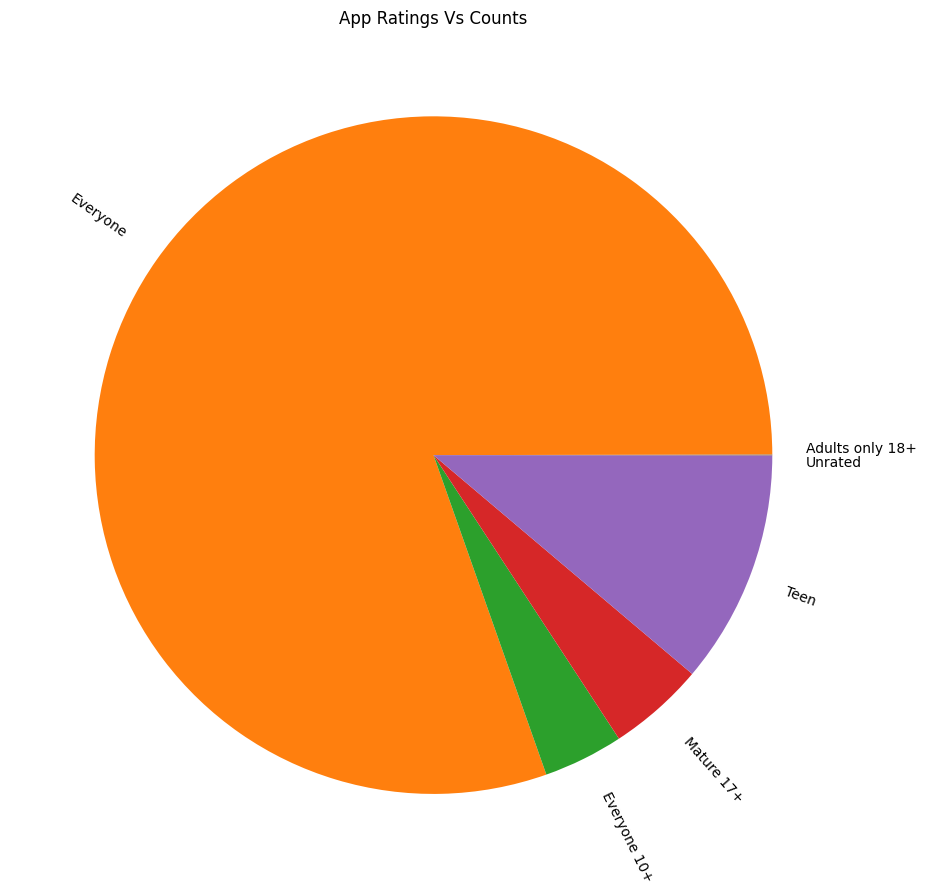

In [14]:
TypeContent = df.groupby("Content Rating")["App"].size().reset_index()
plt.figure(figsize = (15,11))
plt.pie(TypeContent["App"], labels = TypeContent["Content Rating"], rotatelabels = True)
plt.title("App Ratings Vs Counts")
plt.show()

